In [440]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [441]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")

In [442]:
df.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


# Preparing dataset

In [443]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [444]:
df = df[['ram','storage','screen','final_price']]

# EDA

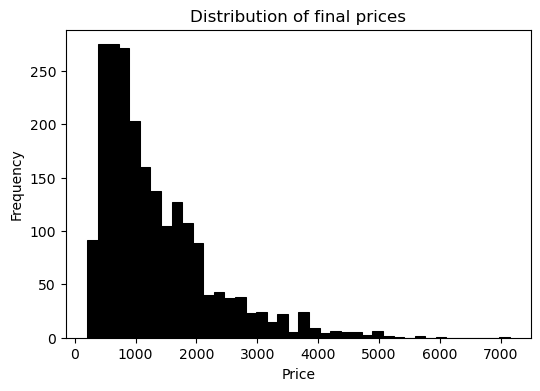

In [445]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of final prices')

plt.show()

# Question 1
There's one column with missing values. What is it?

In [446]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2.
What's the median (50% percentile) for variable 'ram'?

In [447]:
df['ram'].median()

16.0

# Prepare and split the dataset

In [448]:
def prepare_and_split_dataset(df, seed= 42):
    np.random.seed(seed=seed)

    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    return df_train, df_test, df_val

# Question 3

## Fill with 0

Create a dataframe which is filled na with 0:

In [449]:
df_fill0 = df.fillna(0).copy()

Create train, test, validation dataset and y:

In [450]:
df_train, df_test, df_val = prepare_and_split_dataset(df_fill0)
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

# y_train = np.log1p(df_train.final_price.values)
# y_val = np.log1p(df_val.final_price.values)
# y_test = np.log1p(df_test.final_price.values)

Delete "final_price" column:

In [451]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

Linear regression function:

In [452]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])  # Bias/Intercept
    X = np.column_stack([ones, X]) 
    XTX = X.T.dot(X)    # Normal Equation formula:
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [453]:
def prepare_X(df):
    return df.values

In [454]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [455]:
X_train = prepare_X(df_train)
w_0, w =train_linear_regression(X_train, y_train)

In [456]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

597.36

## Fill with mean:

Create a dataframe which is filled na with mean:

In [457]:
df_fill_mean = df.fillna(df.final_price.mean()).copy()

Create train, test, validation dataset and y:

In [458]:
df_train, df_test, df_val = prepare_and_split_dataset(df_fill_mean)
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

Linear regression function:

In [459]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])  # Bias/Intercept
    X = np.column_stack([ones, X]) 
    XTX = X.T.dot(X)    # Normal Equation formula:
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [460]:
def prepare_X(df):
    return df.values

In [461]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [462]:
X_train = prepare_X(df_train)
w_0, w =train_linear_regression(X_train, y_train)

In [463]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

597.57

# Question 4

In [464]:
df_train, df_test, df_val = prepare_and_split_dataset(df_fill_mean)
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [465]:
r_grid = [0, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0]

In [466]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [467]:
for r in r_grid:
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    rmse_val = round(rmse_val,2)
    print("r = ", r, "rmse = ",rmse_val)

r =  0 rmse =  597.57
r =  0.01 rmse =  597.57
r =  0.1 rmse =  597.57
r =  1.0 rmse =  597.54
r =  5.0 rmse =  597.43
r =  10.0 rmse =  597.29
r =  100.0 rmse =  595.5


# Question 5

In [468]:
rmse_arr = np.array([],dtype=float)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_test, df_val = prepare_and_split_dataset(df_fill0, seed = seed)
    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)

    rmse_val = rmse(y_val, y_pred)
    rmse_arr = np.append(rmse_arr,rmse_val)

display(round(np.std(rmse_arr),3))

29.176

# Question 6

In [469]:
df_train, df_test, df_val = prepare_and_split_dataset(df_fill0, seed = 9)
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']
y_train = np.concatenate([y_train,y_val])
df_train = pd.concat([df_train, df_val], ignore_index=True)



In [470]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)

In [471]:
rmse(y_test,y_pred)

608.6102791248064